In [1]:
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib as mpl
import gc

In [2]:
train=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/train.csv")
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


[Text(0, 0, '2011-11'),
 Text(0, 0, '2011-12'),
 Text(0, 0, '2012-02'),
 Text(0, 0, '2012-03'),
 Text(0, 0, '2012-04'),
 Text(0, 0, '2012-05'),
 Text(0, 0, '2012-06'),
 Text(0, 0, '2012-07'),
 Text(0, 0, '2012-08'),
 Text(0, 0, '2012-09'),
 Text(0, 0, '2012-10'),
 Text(0, 0, '2012-11'),
 Text(0, 0, '2012-12'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-05'),
 Text(0, 0, '2013-06'),
 Text(0, 0, '2013-07'),
 Text(0, 0, '2013-08'),
 Text(0, 0, '2013-09'),
 Text(0, 0, '2013-10'),
 Text(0, 0, '2013-11'),
 Text(0, 0, '2013-12'),
 Text(0, 0, '2014-01'),
 Text(0, 0, '2014-02'),
 Text(0, 0, '2014-03'),
 Text(0, 0, '2014-04'),
 Text(0, 0, '2014-05'),
 Text(0, 0, '2014-06'),
 Text(0, 0, '2014-07'),
 Text(0, 0, '2014-08'),
 Text(0, 0, '2014-09'),
 Text(0, 0, '2014-10'),
 Text(0, 0, '2014-11'),
 Text(0, 0, '2014-12'),
 Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '2015-04'),
 Text(0, 0, '201

C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)


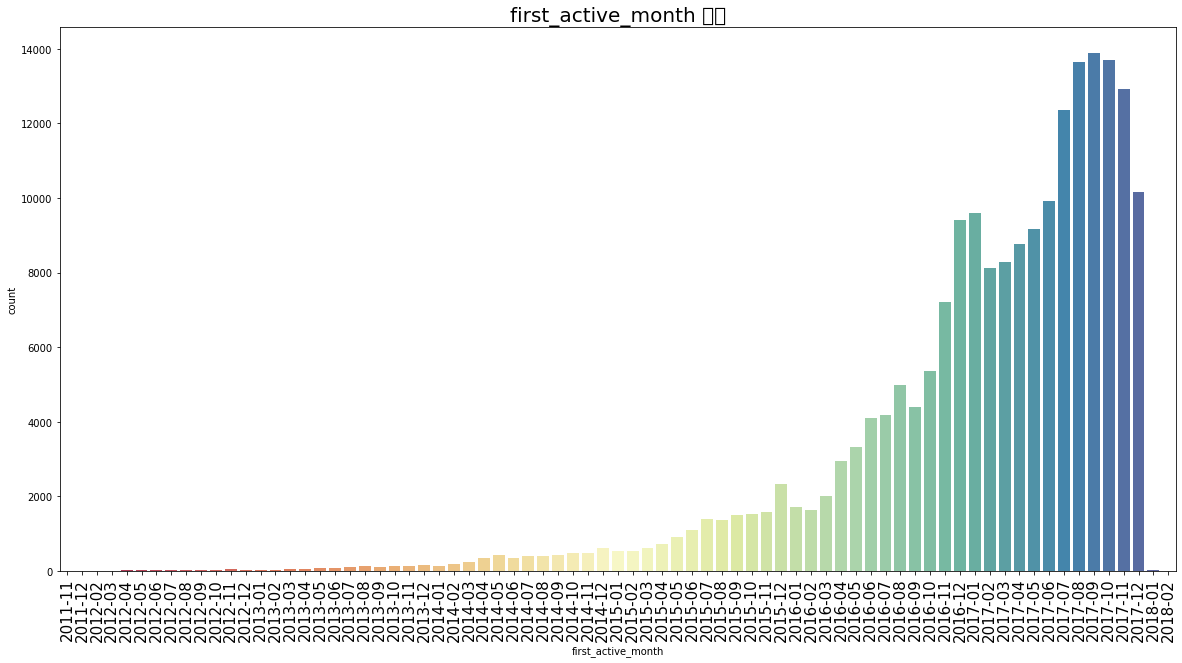

In [3]:
plt.figure(figsize=(20,10))
plt.title("first_active_month 분포",size=20)
first_active_month=sns.countplot(x=train.first_active_month,palette='Spectral',
            order = np.sort(train.first_active_month.value_counts().index))
first_active_month.set_xticklabels(first_active_month.get_xticklabels(), rotation=90, size=15)

In [4]:
train.columns


Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


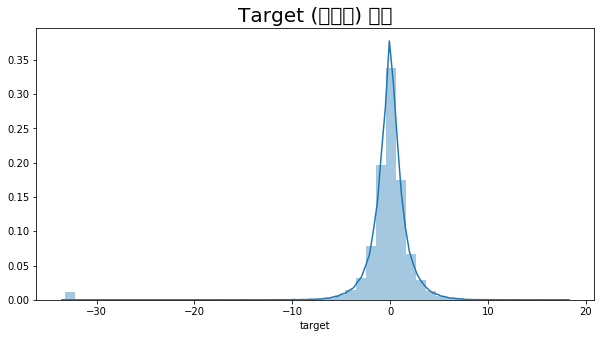

In [5]:
plt.figure(figsize=(10,5))
plt.title("Target (충성도) 분포",size=20)
sns.distplot(train.target)

In [6]:
df = pd.DataFrame(train)
print(df['target'])

0        -0.820283
1         0.392913
2         0.688056
3         0.142495
4        -0.159749
5         0.871585
6         0.230129
7         2.135850
8        -0.065406
9         0.300062
10       -1.029562
11       -2.433761
12        1.304452
13        0.093633
14        1.597750
15        1.010937
16        1.132236
17        0.318062
18        0.757280
19        0.334337
20        1.442726
21        4.747602
22        0.464404
23       -0.529658
24       -0.084951
25        1.525862
26       -0.090744
27       -1.361720
28        0.727093
29        1.143863
            ...   
201887    0.193238
201888    0.076491
201889   -0.024215
201890    0.666202
201891   -1.327112
201892    0.130062
201893    1.047496
201894   -0.882748
201895   -0.549372
201896   -0.616658
201897   -0.133215
201898   -3.360124
201899   -2.702214
201900   -0.151734
201901   -1.743145
201902    1.001529
201903    0.251799
201904   -0.401386
201905    1.182343
201906    0.279741
201907    0.145590
201908    0.

In [7]:
max_num = 1
min_num = 1
 
for num in range(201916):
    ## Find Max Number
    if max_num < train.target[num]:
        max_num = train.target[num]
 
    ## Find Min Number
    if min_num > train.target[num]:
        min_num = train.target[num]
       
print("Max Number: ", max_num)
print("min Number: ", min_num)

Max Number:  17.9650684
min Number:  -33.21928095


In [8]:
df [ df ['target'].isin(['-33.21928095'])]

df.loc[df['target']<-30,:]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.219281
248,2015-07,C_ID_c4262c902e,5,1,1,-33.219281
254,2017-03,C_ID_6a2c823e5f,2,1,0,-33.219281
386,2017-06,C_ID_98e1cb10b6,2,3,0,-33.219281
467,2017-03,C_ID_eb8175721a,4,1,0,-33.219281
515,2016-04,C_ID_a2580006bf,4,2,0,-33.219281


In [ ]:
"""
목표
1.-target -33 의 정체
2. 이상치 값 <<<< 구매량이 적어서 or 구매액이 적어서
"""

In [9]:
test=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/train.csv")

test.head()


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


[Text(0, 0, '2011-11'),
 Text(0, 0, '2011-12'),
 Text(0, 0, '2012-02'),
 Text(0, 0, '2012-03'),
 Text(0, 0, '2012-04'),
 Text(0, 0, '2012-05'),
 Text(0, 0, '2012-06'),
 Text(0, 0, '2012-07'),
 Text(0, 0, '2012-08'),
 Text(0, 0, '2012-09'),
 Text(0, 0, '2012-10'),
 Text(0, 0, '2012-11'),
 Text(0, 0, '2012-12'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-05'),
 Text(0, 0, '2013-06'),
 Text(0, 0, '2013-07'),
 Text(0, 0, '2013-08'),
 Text(0, 0, '2013-09'),
 Text(0, 0, '2013-10'),
 Text(0, 0, '2013-11'),
 Text(0, 0, '2013-12'),
 Text(0, 0, '2014-01'),
 Text(0, 0, '2014-02'),
 Text(0, 0, '2014-03'),
 Text(0, 0, '2014-04'),
 Text(0, 0, '2014-05'),
 Text(0, 0, '2014-06'),
 Text(0, 0, '2014-07'),
 Text(0, 0, '2014-08'),
 Text(0, 0, '2014-09'),
 Text(0, 0, '2014-10'),
 Text(0, 0, '2014-11'),
 Text(0, 0, '2014-12'),
 Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '2015-04'),
 Text(0, 0, '201

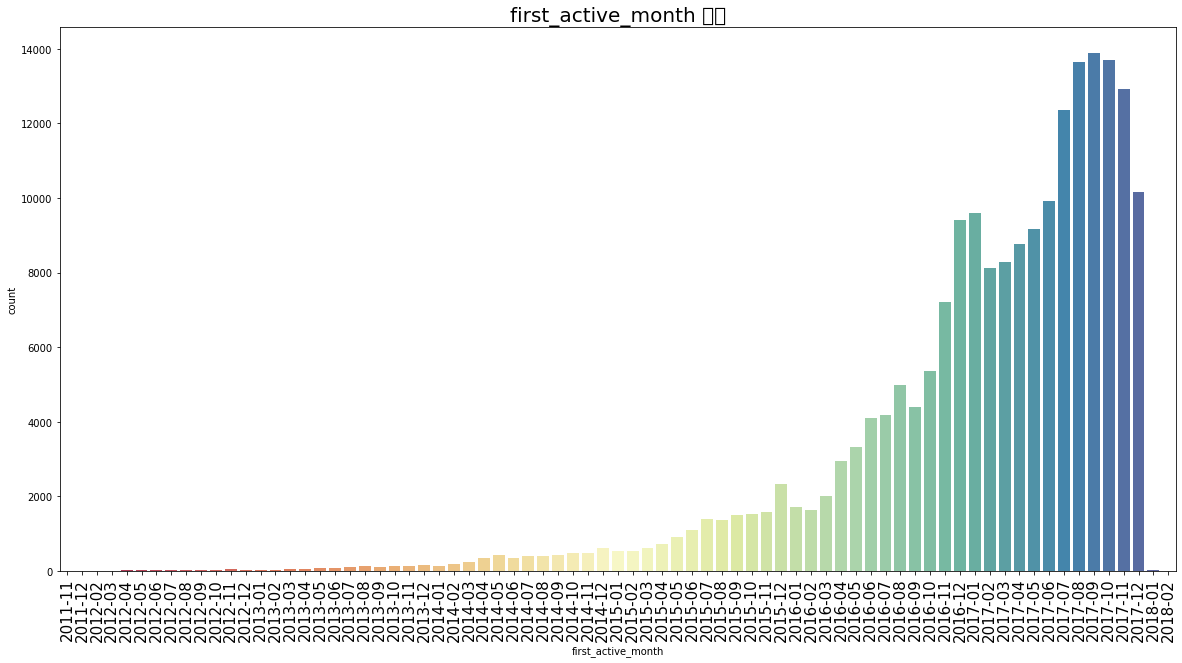

In [10]:
plt.figure(figsize=(20,10))
plt.title("first_active_month 분포",size=20)
first_active_month=sns.countplot(x=test.first_active_month,palette='Spectral',
            order = np.sort(test.first_active_month.value_counts().index))
first_active_month.set_xticklabels(first_active_month.get_xticklabels(), rotation=90, size=15)

In [11]:
df_test = pd.DataFrame(test)
print(df_test)

       first_active_month          card_id  feature_1  feature_2  feature_3  \
0                 2017-06  C_ID_92a2005557          5          2          1   
1                 2017-01  C_ID_3d0044924f          4          1          0   
2                 2016-08  C_ID_d639edf6cd          2          2          0   
3                 2017-09  C_ID_186d6a6901          4          3          0   
4                 2017-11  C_ID_cdbd2c0db2          1          3          0   
5                 2016-09  C_ID_0894217f2f          4          2          0   
6                 2016-12  C_ID_7e63323c00          3          2          1   
7                 2017-09  C_ID_dfa21fc124          3          2          1   
8                 2017-08  C_ID_fe0fdac8ea          2          1          0   
9                 2016-08  C_ID_bf62c0b49d          2          2          0   
10                2016-10  C_ID_92853cdb2c          5          2          1   
11                2016-03  C_ID_269d816788          

In [12]:
train_dummies1=pd.get_dummies(train.feature_1, prefix='feature_1')
train_dummies1.sample(n=5, random_state=1)

,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5
83553,0,0,1,0,0
153554,0,1,0,0,0
129277,0,1,0,0,0
196185,0,1,0,0,0
105072,0,0,1,0,0


In [13]:
train_dummies1.drop(train_dummies1.columns[0], axis=1, inplace=True)
train_dummies1.sample(n=5,random_state=1)

,feature_1_2,feature_1_3,feature_1_4,feature_1_5
83553,0,1,0,0
153554,1,0,0,0
129277,1,0,0,0
196185,1,0,0,0
105072,0,1,0,0


In [14]:
train_dummies2=pd.get_dummies(train.feature_2, prefix='feature_2')
train_dummies2.sample(n=5, random_state=1)

,feature_2_1,feature_2_2,feature_2_3
83553,1,0,0
153554,1,0,0
129277,0,0,1
196185,1,0,0
105072,0,1,0


In [15]:
train_dummies2.drop(train_dummies2.columns[0], axis=1, inplace=True)
train_dummies2.sample(n=5, random_state=1)


,feature_2_2,feature_2_3
83553,0,0
153554,0,0
129277,0,1
196185,0,0
105072,1,0


In [16]:
train_dummies3=pd.get_dummies(train.feature_3, prefix='feature_3')
train_dummies3.sample(n=5, random_state=1)

,feature_3_0,feature_3_1
83553,0,1
153554,1,0
129277,1,0
196185,1,0
105072,0,1


In [17]:
test_dummies1=pd.get_dummies(test.feature_1, prefix='feature_1')
test_dummies1.sample(n=5, random_state=1)


,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5
83553,0,0,1,0,0
153554,0,1,0,0,0
129277,0,1,0,0,0
196185,0,1,0,0,0
105072,0,0,1,0,0


In [18]:
test_dummies1.drop(test_dummies1.columns[0], axis=1, inplace=True)
test_dummies1.sample(n=5, random_state=1)


,feature_1_2,feature_1_3,feature_1_4,feature_1_5
83553,0,1,0,0
153554,1,0,0,0
129277,1,0,0,0
196185,1,0,0,0
105072,0,1,0,0


In [19]:
test_dummies2=pd.get_dummies(test.feature_2, prefix='feature_2')
test_dummies2.drop(test_dummies2.columns[0], axis=1, inplace=True)
test_dummies2.sample(n=5, random_state=1)

,feature_2_2,feature_2_3
83553,0,0
153554,0,0
129277,0,1
196185,0,0
105072,1,0


In [20]:
test_dummies3=pd.get_dummies(test.feature_3, prefix='feature_3')
test_dummies3.drop(test_dummies3.columns[0], axis=1, inplace=True)
test_dummies3.sample(n=5, random_state=1)

,feature_3_1
83553,1
153554,0
129277,0
196185,0
105072,1


In [21]:
train=pd.concat([train, train_dummies1,train_dummies2,train_dummies3], axis=1)
train.sample(n=5,random_state=1)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_2,feature_2_3,feature_3_0,feature_3_1
83553,2016-06,C_ID_3b90456c50,3,1,1,-1.121001,0,1,0,0,0,0,0,1
153554,2017-03,C_ID_f3e18595cc,2,1,0,-0.427238,1,0,0,0,0,0,1,0
129277,2017-08,C_ID_4436c02956,2,3,0,2.785142,1,0,0,0,0,1,1,0
196185,2017-05,C_ID_302a3f6b3e,2,1,0,0.894260,1,0,0,0,0,0,1,0
105072,2017-04,C_ID_ef9c02d762,3,2,1,0.143042,0,1,0,0,1,0,0,1


In [22]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'feature_1_2', 'feature_1_3', 'feature_1_4', 'feature_1_5',
       'feature_2_2', 'feature_2_3', 'feature_3_0', 'feature_3_1'],
      dtype='object')

In [23]:
test=pd.concat([test, test_dummies1,test_dummies2,test_dummies3], axis=1)
test.sample(n=5, random_state=1)


,first_active_month,card_id,feature_1,feature_2,feature_3,target,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_2,feature_2_3,feature_3_1
83553,2016-06,C_ID_3b90456c50,3,1,1,-1.121001,0,1,0,0,0,0,1
153554,2017-03,C_ID_f3e18595cc,2,1,0,-0.427238,1,0,0,0,0,0,0
129277,2017-08,C_ID_4436c02956,2,3,0,2.785142,1,0,0,0,0,1,0
196185,2017-05,C_ID_302a3f6b3e,2,1,0,0.894260,1,0,0,0,0,0,0
105072,2017-04,C_ID_ef9c02d762,3,2,1,0.143042,0,1,0,0,1,0,1


In [24]:
print(test.describe)

<bound method NDFrame.describe of        first_active_month          card_id  feature_1  feature_2  feature_3  \
0                 2017-06  C_ID_92a2005557          5          2          1   
1                 2017-01  C_ID_3d0044924f          4          1          0   
2                 2016-08  C_ID_d639edf6cd          2          2          0   
3                 2017-09  C_ID_186d6a6901          4          3          0   
4                 2017-11  C_ID_cdbd2c0db2          1          3          0   
5                 2016-09  C_ID_0894217f2f          4          2          0   
6                 2016-12  C_ID_7e63323c00          3          2          1   
7                 2017-09  C_ID_dfa21fc124          3          2          1   
8                 2017-08  C_ID_fe0fdac8ea          2          1          0   
9                 2016-08  C_ID_bf62c0b49d          2          2          0   
10                2016-10  C_ID_92853cdb2c          5          2          1   
11                

In [25]:
history_trans=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/historical_transactions.csv")

In [26]:
history_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [27]:
new_merchant=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/new_merchant_transactions.csv")

In [28]:
new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [29]:
def aggregate_transaction_hist(trans, prefix):  
        
    agg_func = {
        'purchase_date' : ['max','min'],
        'month_diff' : ['mean', 'min', 'max', 'var'],
        'weekend' : ['sum', 'mean'],
        'authorized_flag': ['sum', 'mean'],
        'category_1': ['sum','mean', 'max','min'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],  
        'month_lag': ['max','min','mean','var'],
        'card_id' : ['size'],
        'month': ['nunique'],
        'hour': ['nunique'],
        'quarter':['nunique'],
        'is_month_start':['nunique'],
        'weekofyear': ['nunique'],
        'dayofweek': ['nunique'],
        'year': ['nunique'],
        'subsector_id': ['nunique'],
        'merchant_category_id' : ['nunique'],
        'Christmas_Day_2017':['mean'],
        'fathers_day_2017':['mean'],
        'Children_day_2017':['mean'],
        'Black_Friday_2017':['mean'],
        'Valentine_day_2017':['mean'],
        'Mothers_Day_2018':['mean']
    }
    
    agg_trans = trans.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() 
                           for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)
    
    df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))
    
    agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')
    
    return agg_trans

In [30]:
history_trans['authorized_flag'] = history_trans['authorized_flag'].map({'Y': 1, 'N': 0})
history_trans['category_1'] = history_trans['category_1'].map({'Y': 1, 'N': 0})

In [31]:
#Feature Engineering - Adding new features inspired by Chau's first kernel
history_trans['purchase_date'] = pd.to_datetime(history_trans['purchase_date'])
history_trans['year'] = history_trans['purchase_date'].dt.year
history_trans['weekofyear'] = history_trans['purchase_date'].dt.weekofyear
history_trans['month'] = history_trans['purchase_date'].dt.month
history_trans['dayofweek'] = history_trans['purchase_date'].dt.dayofweek
history_trans['weekend'] = (history_trans.purchase_date.dt.weekday >=5).astype(int)
history_trans['hour'] = history_trans['purchase_date'].dt.hour 
history_trans['quarter'] = history_trans['purchase_date'].dt.quarter
history_trans['is_month_start'] = history_trans['purchase_date'].dt.is_month_start
history_trans['month_diff'] = ((dt.datetime.today() - history_trans['purchase_date']).dt.days)//30
history_trans['month_diff'] += history_trans['month_lag']

#impute missing values - This is now excluded.
history_trans['category_2'] = history_trans['category_2'].fillna(1.0,inplace=True)
history_trans['category_3'] = history_trans['category_3'].fillna('A',inplace=True)
history_trans['category_3'] = history_trans['category_3'].map({'A':0, 'B':1, 'C':2})
gc.collect()

42

In [32]:
agg_func = {
        'mean': ['mean'],
    }
for col in ['category_2','category_3']:
    history_trans[col+'_mean'] = history_trans['purchase_amount'].groupby(history_trans[col]).agg('mean')
    history_trans[col+'_max'] = history_trans['purchase_amount'].groupby(history_trans[col]).agg('max')
    history_trans[col+'_min'] = history_trans['purchase_amount'].groupby(history_trans[col]).agg('min')
    history_trans[col+'_var'] = history_trans['purchase_amount'].groupby(history_trans[col]).agg('var')
    agg_func[col+'_mean'] = ['mean']

In [33]:
# New Features with Key Shopping times considered in the dataset. if the purchase has been made within 60 days, it is considered as an influence
#Christmas : December 25 2017
history_trans['Christmas_Day_2017'] = (pd.to_datetime('2017-12-25') - history_trans['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
#Mothers Day: May 14 2017
#transactions['Mothers_Day_2017'] = (pd.to_datetime('2017-05-04') - transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
#fathers day: August 13 2017
history_trans['fathers_day_2017'] = (pd.to_datetime('2017-08-13') - history_trans['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
#Childrens day: October 12 2017
history_trans['Children_day_2017'] = (pd.to_datetime('2017-10-12') - history_trans['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
#Black Friday : 24th November 2017
history_trans['Black_Friday_2017'] = (pd.to_datetime('2017-11-24') - history_trans['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
#Valentines Day
history_trans['Valentine_day_2017'] = (pd.to_datetime('2017-06-12') - history_trans['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)

#2018
#Mothers Day: May 13 2018
history_trans['Mothers_Day_2018'] = (pd.to_datetime('2018-05-13') - history_trans['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)

gc.collect()

109

In [37]:
merge_trans = aggregate_transaction_hist(history_trans, prefix='hist_')
train = pd.merge(train, history_trans, on='card_id',how='left')
test = pd.merge(test, merge_trans, on='card_id',how='left')
del merge_trans
gc.collect()

MemoryError: 

In [39]:
train = pd.merge(train, history_trans, on='card_id',how='left')

MemoryError: 

In [36]:
train = pd.merge(train, merge_trans, on='card_id',how='left')
test = pd.merge(test, merge_trans, on='card_id',how='left')
del merge_trans
gc.collect()

NameError: name 'merge_trans' is not defined

In [38]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_2,feature_2_3,feature_3_0,feature_3_1
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,0,0,0,1,1,0,0,1
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,0,0,1,0,0,0,1,0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,1,0,0,0,1,0,1,0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,0,0,1,0,0,1,1,0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,0,0,0,0,0,1,1,0


In [ ]:
"""
현재의 충성도는 원래의 충성도 값에 0.0000000001을 더한 후 밑이 2인 로그를 씌워준 값이다. 
이를 역으로 계산해보면, -33.21928095의 원래 값은 0이고 두 번째로 작은 값인 -17.60814651의 원래 값은 0.000005이다. 
Elo에서 컴피티션에 올릴 때 모종의 이유로 변환하여 올린 것으로 추측된다.
"""